In [31]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [32]:
face_cascade=cv2.CascadeClassifier('C:\\Users\\HP\\Desktop\\face_recognition\\haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('C:\\Users\\HP\\Desktop\\face_recognition\\haarcascade_eye.xml')

In [74]:
import numpy as np
import cv2

img = cv2.imread('C:\\Users\\HP\\Desktop\\face_recognition\\raw_image_database\\nikko_priya_2.CR2')
img.shape

(3456, 5184, 3)

In [75]:
#img=cv2.resize(img,(256,256))

In [76]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

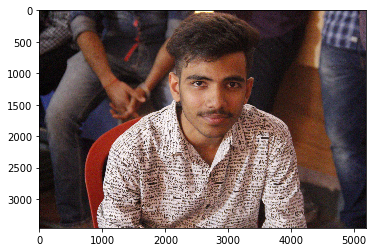

In [77]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [78]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

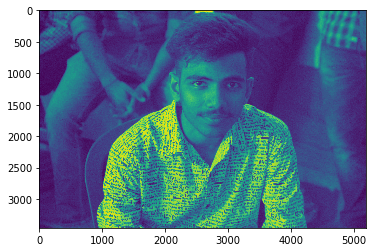

In [79]:
import matplotlib.pyplot as plt
plt.imshow(gray)

In [80]:
gray

array([[15, 24, 30, ..., 74, 77, 83],
       [10, 19, 26, ..., 78, 74, 74],
       [10, 19, 26, ..., 74, 65, 59],
       ...,
       [14, 14, 15, ..., 15, 15, 14],
       [15, 15, 14, ..., 16, 15, 12],
       [20, 19, 18, ..., 14,  9,  6]], dtype=uint8)

In [81]:
faces=[]
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)
print(len(faces))
start_row,start_col,end_row,end_col=faces[0]

[[2064  679 1343 1343]
 [1017 2914   87   87]]
2


In [82]:
print(start_row)
print(start_col)
print(end_row)
print(end_col)

2064
679
1343
1343


In [83]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)



In [84]:
path='C:\\Users\\HP\\Desktop\\face_recognition\\cropped_image_database'

In [85]:
cropped=gray[start_col:start_col+end_col,start_row:start_row+end_row]
cropped=cv2.resize(cropped,(96,96))
img_name = "opencv_frame_{}.png".format(input())
cv2.imwrite(path+'/'+str(img_name), cropped)
print("{} written!".format(img_name))

nikko_2
opencv_frame_nikko_2.png written!


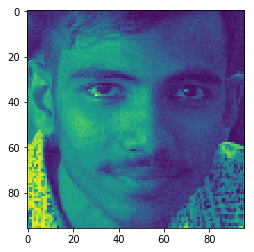

In [86]:
plt.imshow(cropped)

In [87]:
cropped.shape

(96, 96)

In [33]:
path='C:\\Users\\HP\\Desktop\\face_recognition\\cropped_image_database'
plt.savefig('cropped')

<Figure size 432x288 with 0 Axes>

In [34]:
cv2.imshow('img',gray)
cv2.waitKey(0)
cv2.imshow('cropped',cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()